# Part 2

## 4. Perceptron


Imports

In [11]:
import pandas as pd
import numpy as np
import math
from random import random

%matplotlib inline
import matplotlib.pyplot as plt

Load the Iris dataset

In [12]:
file_path = "../UCIdata-exercise1/iris.data"
df = pd.read_csv(file_path, header=None).sample(frac=1)

---

In [17]:
"""
    Draws a plot
"""
def plot_scatter(x, y):
    for i, point in enumerate(x):
        if y[i] == 'Iris-setosa':
            plt.scatter(x[i,0], x[i,1], color="red", marker='s')
        elif y[i] == 'Iris-versicolor':
            plt.scatter(x[i,0], x[i,1], color="blue", marker='x')
        else:
            plt.scatter(x[i,0], x[i,1], color="black", marker='o')

        plt.xlabel('sepal length in cm')
        plt.ylabel('petal length in cm')

"""
   The perceptron algorithm for iris dataset
"""
def perceptron(train):
    w = [0, 0, 0, 0, 0] 
    while(1):
        stop_flag = True
        for row in train:
            t=1
            if(row[-1] == "Iris-setosa"):
                t=-1
            wtx = 0
            for i, x in enumerate(row[:-1]):
                wtx += w[i]*x*t
            wtx += w[4]*(-1)*t 
            if wtx <= 0:
                #update
                for i in range(len(w)):
                    if i<4:
                        w[i] = w[i]+row[i]*t
                    else:
                        w[i] = w[i]+t*(-1)
                stop_flag = False
        if stop_flag:
            break;
        else:
            continue;
    return w

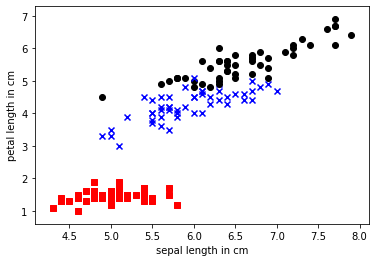

In [18]:
data = df.values
y = data[:, [4]]
x = data[:, [0,2]]

plot_scatter(x,y)

As we can see from the plot, those three catergories are _not linear seperatable_. That's because the of **Iris-versicolor** and **Iris-virginica** are mixed.

So, we cannot seperate those three classes with just one perceptron.

However if we combine the **Iris-versicolor** and **Iris-virginica** into one class then the new categories are _linear seperatable_ as we can see in the plot below.

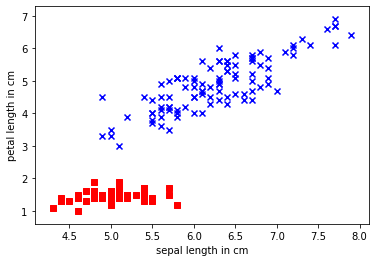

In [19]:
y = np.where(y == 'Iris-setosa', "Iris-setosa","Iris-versicolor")
plot_scatter(x,y)

In [22]:
# Randomly split the dataset into train/test
index = int(random()*10)
test = df[int(index*len(df)*0.1):int(index*len(df)*0.1)+int(len(df)*0.1)]
train = df[0:int(index*len(df)*0.1)]
train = train.append(df[int(index*len(df)*0.1)+int(len(df)*0.1):])

train = train.values
test = test.values

w = perceptron(train)

total_correct = 0
for row in test:
    pos = 0
    for i, x in enumerate(row[:-1]):
        pos += x*w[i]
    pos += w[4]
    if pos < 0:
        if row[-1] == "Iris-setosa":
            total_correct+=1
    else:
        if row[-1] == "Iris-versicolor" or row[-1] == "Iris-virginica":
            total_correct+=1

accuracy = total_correct/len(test)
print("Accuracy: ", accuracy*100, "%")

Accuracy:  100.0 %


---

## Repost

As we can see the problem now has become linear seperatable, and the perceptron achivies 100% accuracy because it can easily seperates the two classes.